# **EDA practice project**

--------------------------------
## **Context**
-------------------------------

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


----------------------------
## **Objective**
-----------------------------

Perform an EDA on the dataset, reduce it's dimension with PCA.

--------------------------
## **Data Description**
--------------------------

- **id**: Column id of pandas
- **SepalLenghtCm**: Lenght on cm of sepal flower
- **SepalWidthCm**: Width on cm sepal petal flower
- **PetalLenghtCm**: Lenght on peatl flower
- **PetalWidthCm**: Width on cm petal flower
- **Species**: Flower species on dataset


## **Importing the necessary libraries and overview of the dataset**

In [2]:
!pip install scikit-learn-extra --upgrade

In [2]:
!pip uninstall -y numpy


Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.26.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.

In [5]:
!pip install seaborn

  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you 

In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#Load Iris dataset
from sklearn.datasets import load_iris

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
import pandas as pd

# 1. Montar Google Drive
drive.mount('/content/drive')

# 2. Leer el archivo CSV
ruta = '/content/drive/MyDrive/Colab Notebooks/Iris.csv'
df = pd.read_csv(ruta)

# 3. Ver las primeras filas
print(df.head())


Mounted at /content/drive
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


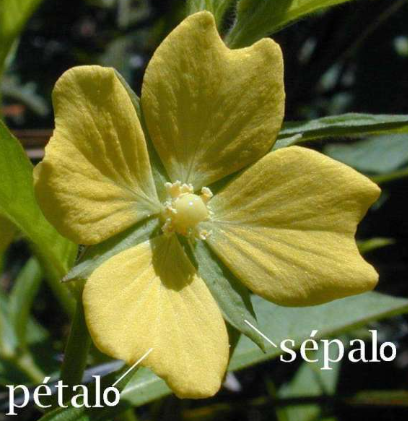

In [6]:
# Check the shape of the data
df.shape

(150, 6)

Sampling is taking a subgroup from a data set, stratified sampling is taking a subgroup defining its random interval, and systematic sampling is a selection by excluded segments.

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Get a random sample of the data, a stratified sample, and a systematic sample,
aleatory_sample = df.sample(8)
stratified_sample = df.sample(frac=0.25)
systematic_sample = df.iloc[::5]

print("Aleatory sample:\n", aleatory_sample)
print("\nStratified sample:\n", stratified_sample)
print("\nSystematic sample:\n", systematic_sample)
print(stratified_sample.shape)

Aleatory sample:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
19    20            5.1           3.8            1.5           0.3   
68    69            6.2           2.2            4.5           1.5   
137  138            6.4           3.1            5.5           1.8   
86    87            6.7           3.1            4.7           1.5   
135  136            7.7           3.0            6.1           2.3   
89    90            5.5           2.5            4.0           1.3   
125  126            7.2           3.2            6.0           1.8   
52    53            6.9           3.1            4.9           1.5   

             Species  
19       Iris-setosa  
68   Iris-versicolor  
137   Iris-virginica  
86   Iris-versicolor  
135   Iris-virginica  
89   Iris-versicolor  
125   Iris-virginica  
52   Iris-versicolor  

Stratified sample:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
102  103            7.1           3.0            5.9 

In [8]:
# Checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Copying the data to another variable to avoid any changes to original data
df_copy = df.copy()

In [10]:
# Check for duplicate values
df_copy.duplicated().sum()

np.int64(0)

In [11]:
# Check for missing values in the data
df_copy.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [12]:
#Select data from the first 10 rows and Group data by sepal length
df_copy.iloc[:10].groupby('SepalLengthCm').sum()

,Id,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,,,,,
4.4,9,2.9,1.4,0.2,Iris-setosa
4.6,11,6.5,2.9,0.5,Iris-setosaIris-setosa
4.7,3,3.2,1.3,0.2,Iris-setosa
4.9,12,6.1,2.9,0.3,Iris-setosaIris-setosa
5.0,13,7.0,2.9,0.4,Iris-setosaIris-setosa
5.1,1,3.5,1.4,0.2,Iris-setosa
5.4,6,3.9,1.7,0.4,Iris-setosa


In [13]:
#Order data by descending sepal length
df_copy.sort_values(by='SepalLengthCm', ascending=False)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica


## **Exploratory Data Analysis**

**Let's check the statistical summary of the data**

In [14]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


**Observations and Insights:**

We can now see that the length of the petal is the one with the greatest standard deviation, that is, it is the one with the most dispersed data from the mean.

### **Univariate Analysis**

In [15]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = True, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots

    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--",label = "mean"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-", label = "median"
    )  # Add median to the histogram

    plt.show()


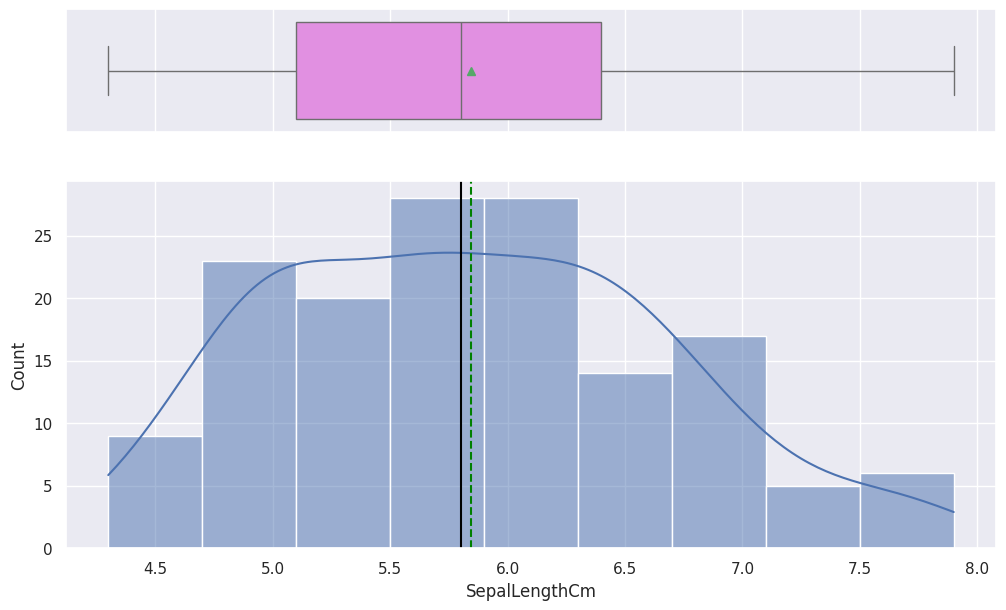

In [ ]:
histogram_boxplot(df_copy, 'SepalLengthCm')  # Complete the code to create histogram_boxplot for 'SepalLengthCm'

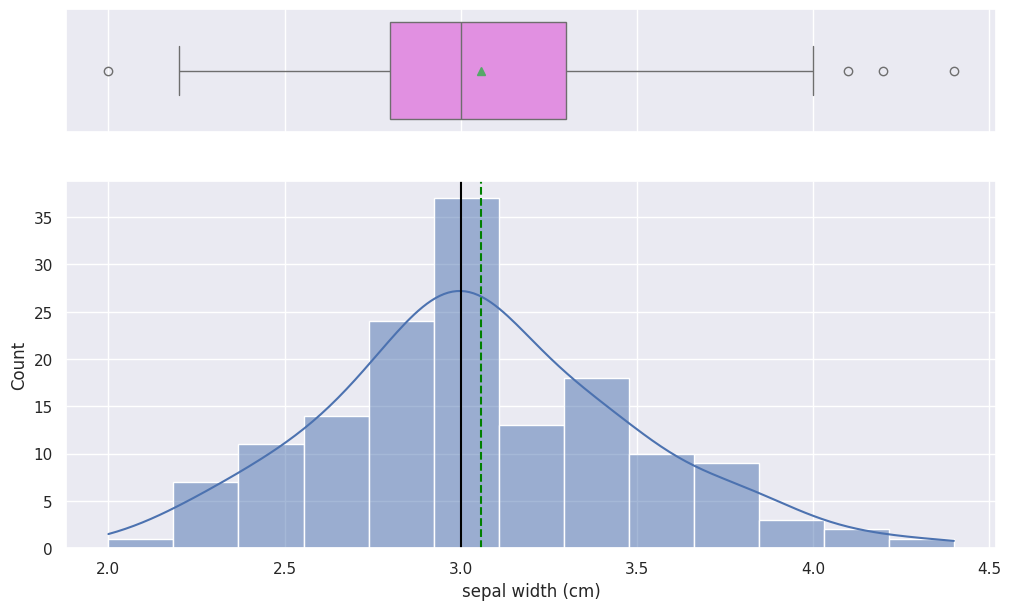

In [ ]:
# Plot the histogram and the boxplot for 'SepalWidthCm'
histogram_boxplot(df_copy, 'sepal width (cm)')

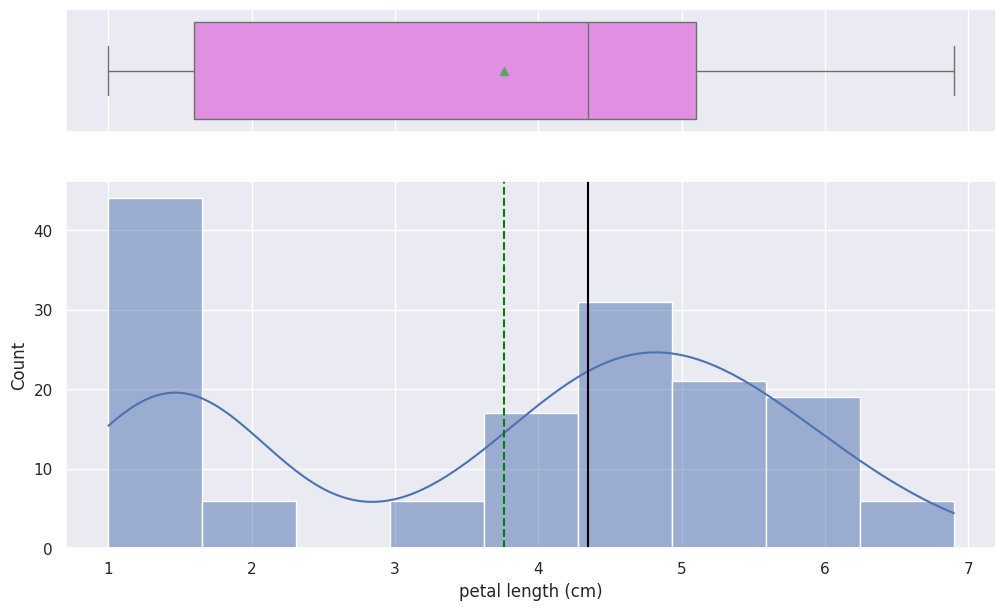

In [ ]:
# Plot the histogram and the boxplot for 'PetalLengthCm'
histogram_boxplot(df_copy, 'petal length (cm)')

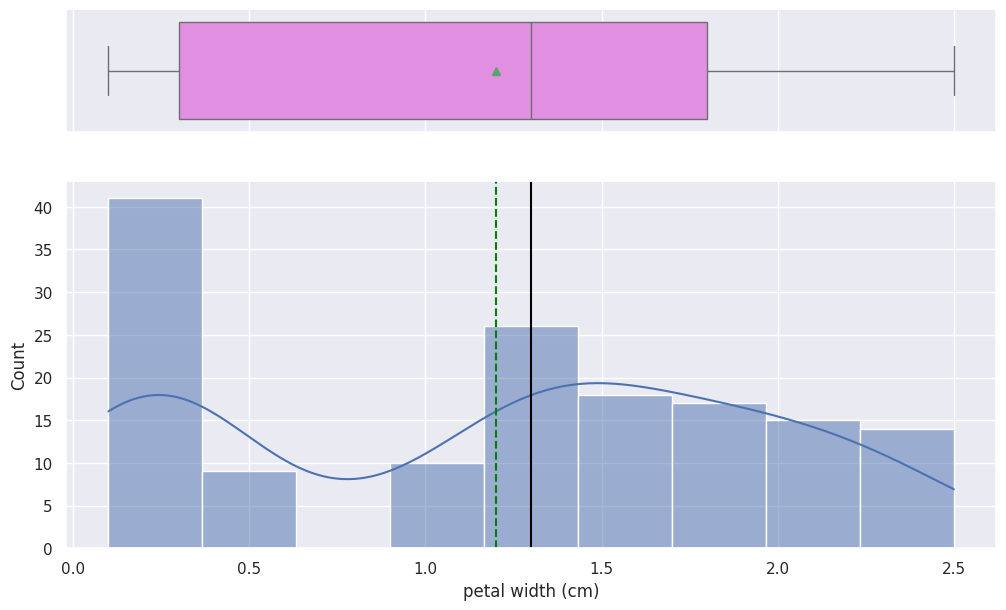

In [ ]:
# Plot the histogram and the boxplot for 'PetalWidthCm'
histogram_boxplot(df_copy, 'petal width (cm)')

**Observations and Insights for all the plots:**
I can see that the length and width of the sepal correspond to a normal distribution, where they differ in their kurtosis.
But in the case of the petal, if we see that their distributions are bimodal, it could be due to the difference between the species.

In [16]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

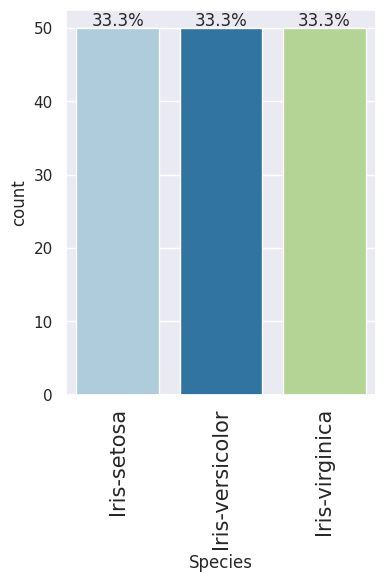

In [19]:
labeled_barplot(data = df_copy, feature = "Species", perc = True )  # Complete the code to create a labelled barplot for 'Species'

**Observations and Insights:**

The graph shows how we have the same amount for each species

**We are done with univariate analysis. Let's explore the data a bit more with bivariate analysis.**

### **Bivariate Analysis**

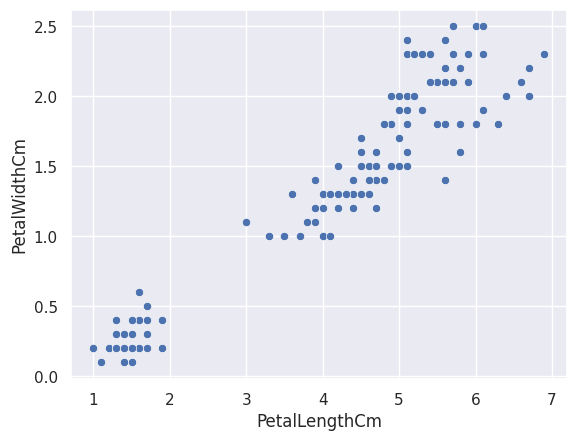

In [22]:
# Scatter plot Petal Length vs. Petal Width

sns.scatterplot(data = df_copy, x = 'PetalLengthCm', y = 'PetalWidthCm')
plt.show()

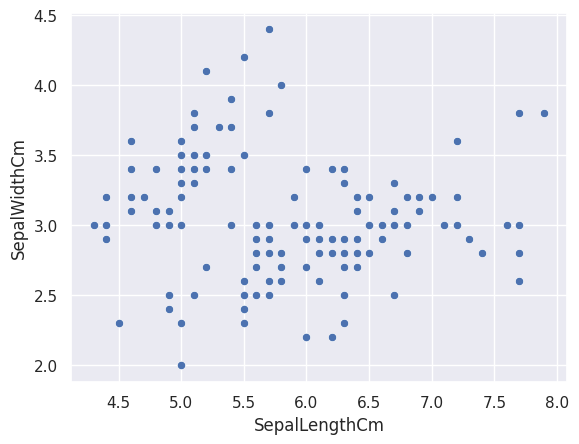

In [23]:
# Example: Sepal Length vs. Sepal Width

sns.scatterplot(data=df_copy, x='SepalLengthCm', y='SepalWidthCm')
plt.show()

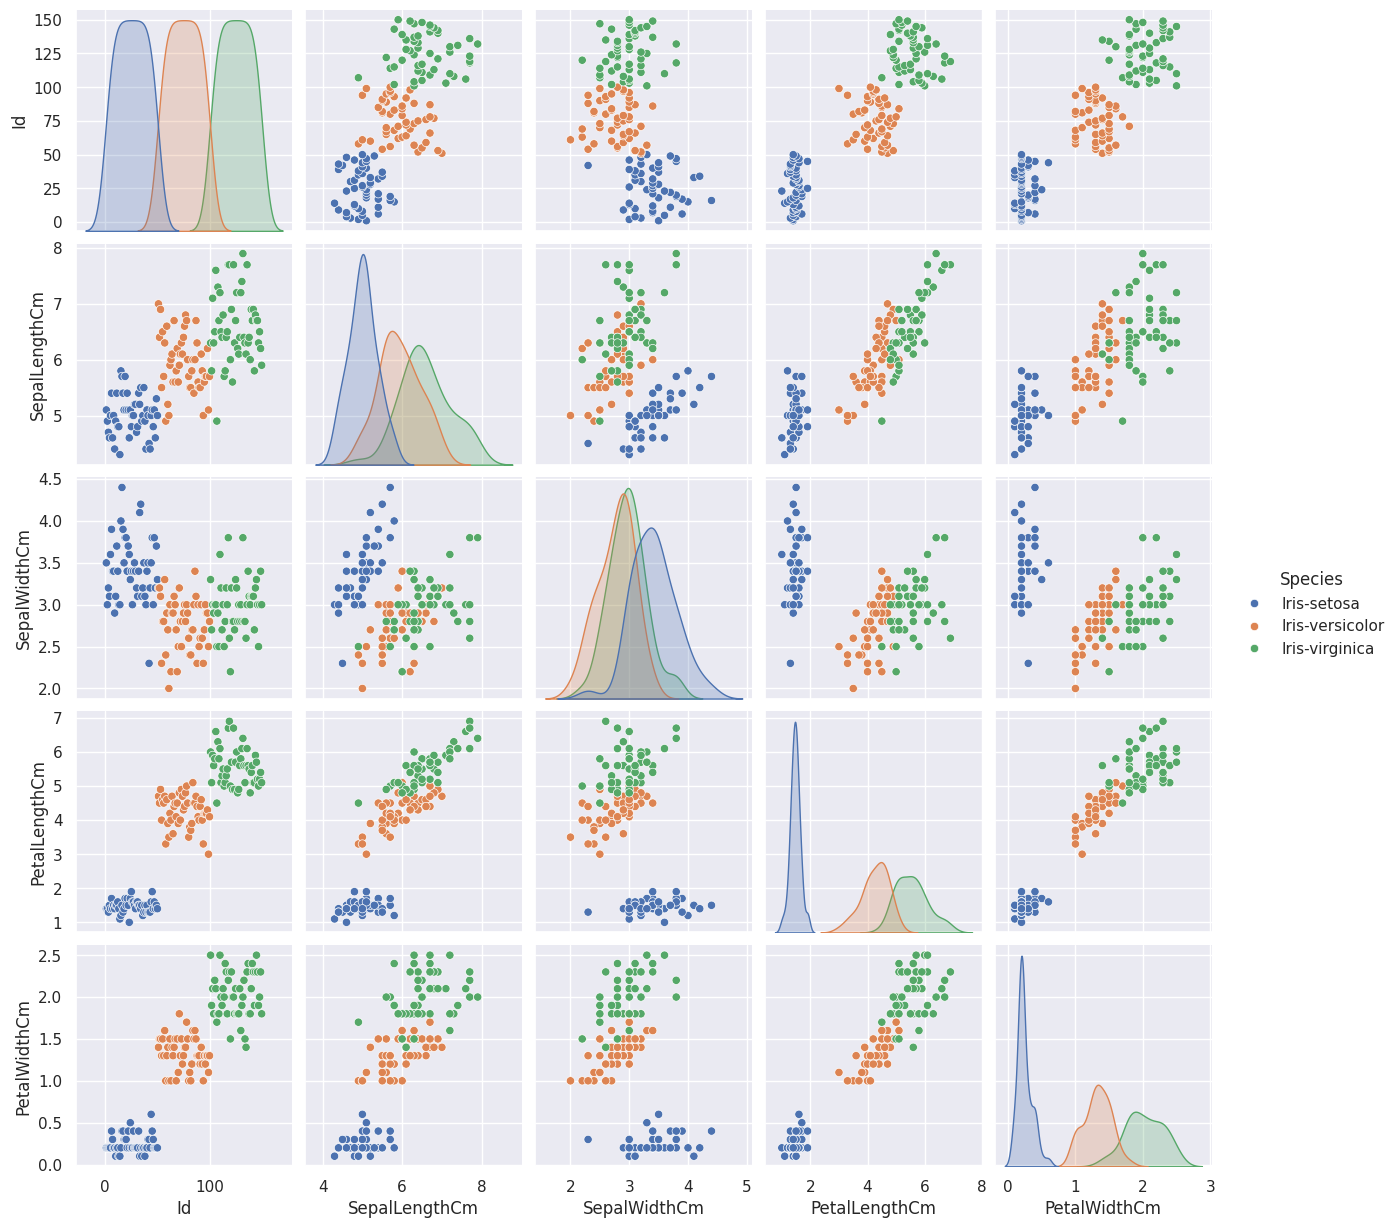

In [24]:
#Pair Plot of Iris Features by Species
sns.pairplot(df_copy, hue='Species')
plt.show()
# Your code here

### **Multivariate Analysis**

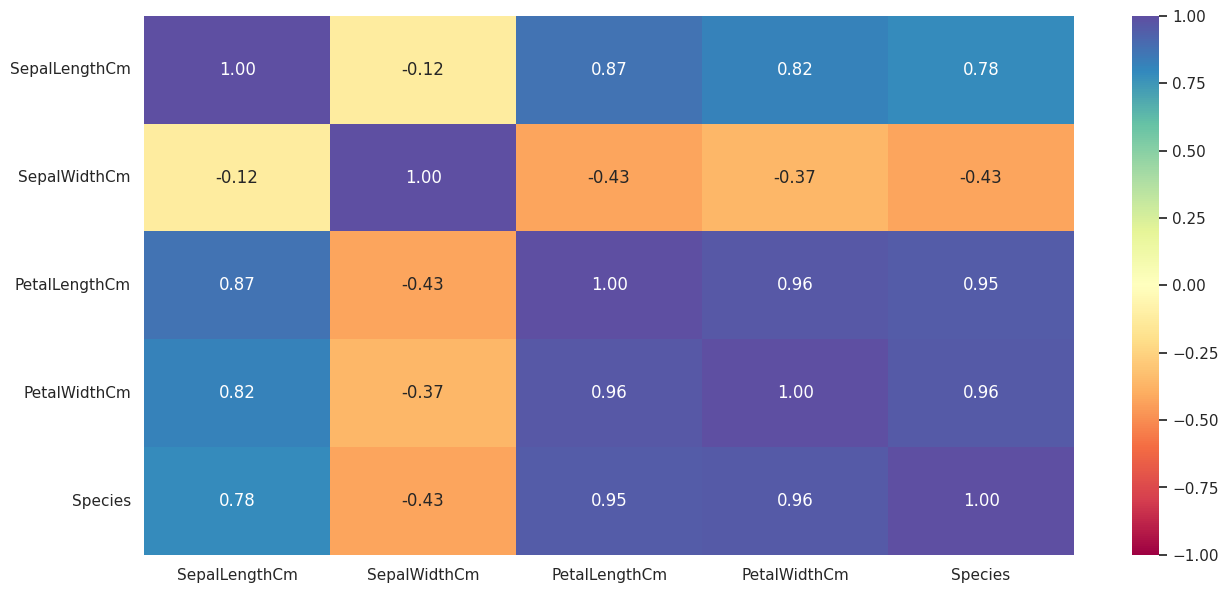

In [51]:
# Correlation check
cols_list = df.select_dtypes(include=np.number).columns.tolist()

if 'Id' in cols_list:
    cols_list.remove('Id')

plt.figure(figsize=(15, 7))

sns.heatmap(
    df[cols_list].corr(numeric_only=True),
    annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

plt.show()


**Observations and Insights:**

Analyzing the correlation matrix, it can be seen that the petal length is highly correlated with the petal width.

**Let's check specimens from which sepals have the longest length on average.**

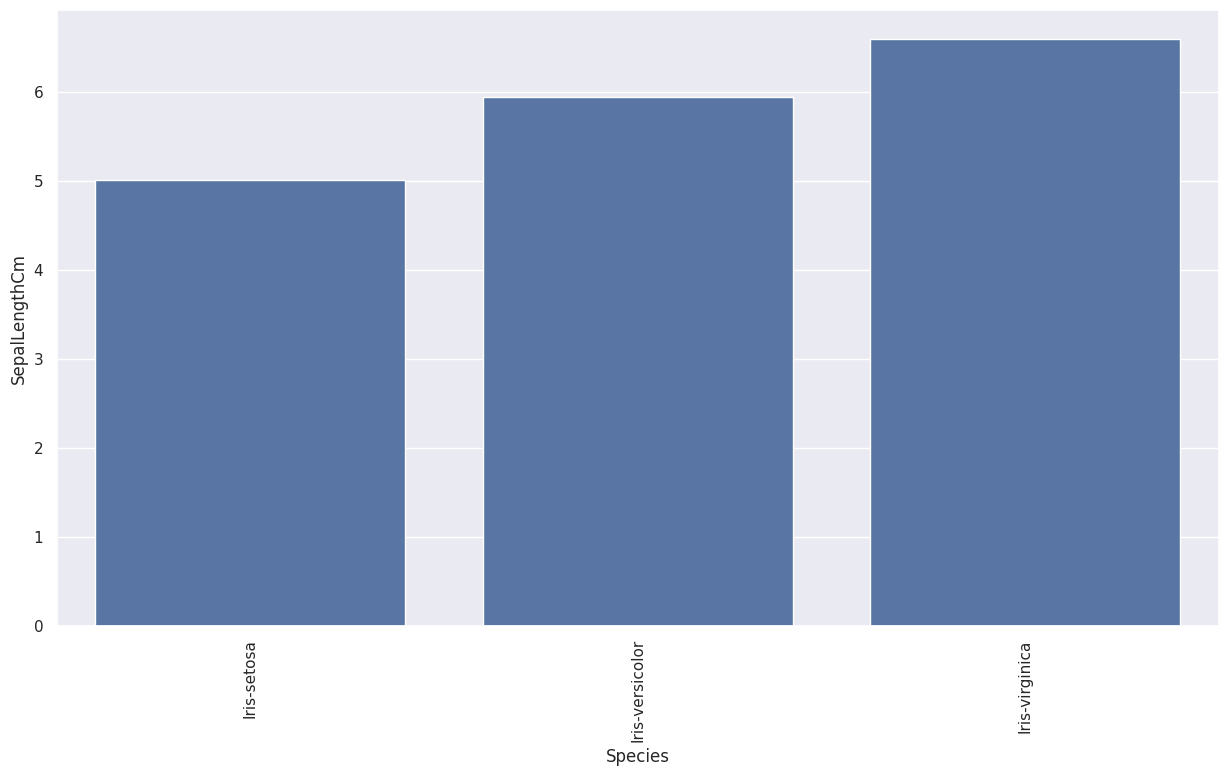

In [30]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Species' , y ='SepalLengthCm', errorbar=('ci', False))  # Complete the code to choose the right variables

plt.xticks(rotation = 90)

plt.show()

**Let's check specimens from which sepals have the longest width on average.**

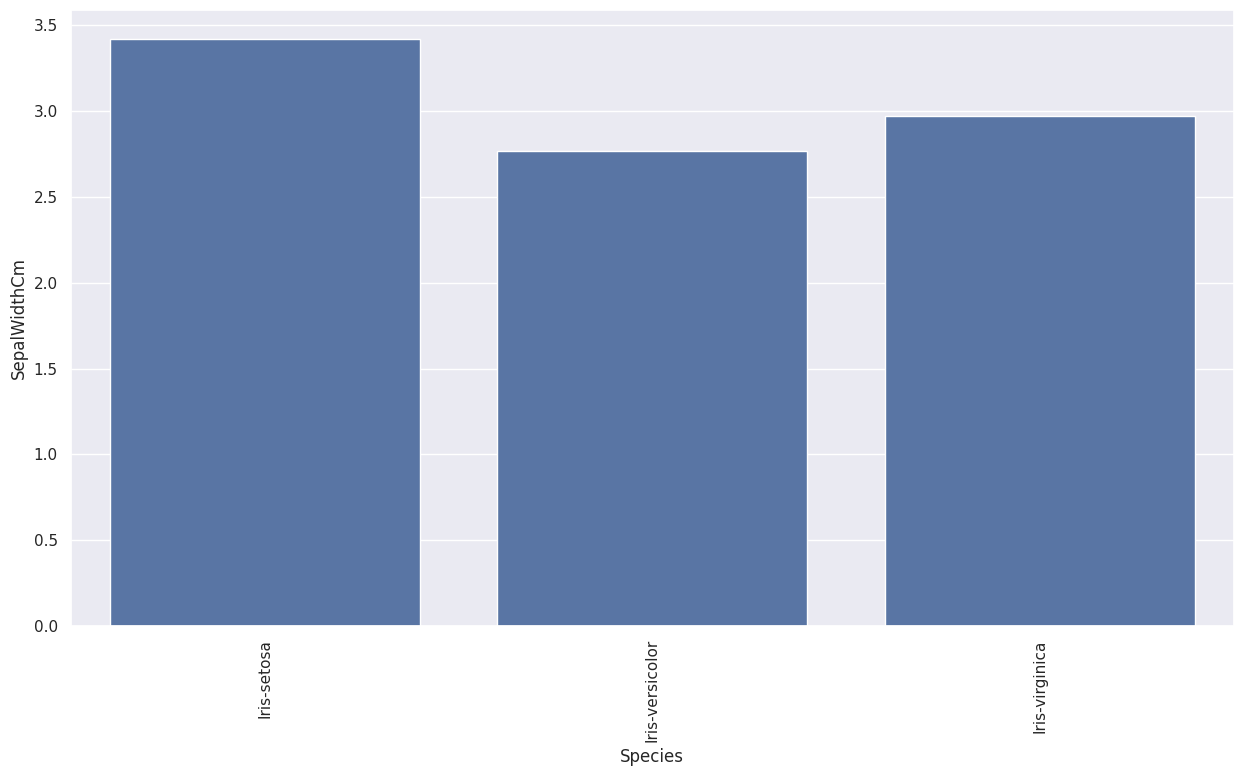

In [32]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Species' , y ='SepalWidthCm', errorbar=('ci', False))  # Complete the code to choose the right variables

plt.xticks(rotation = 90)

plt.show()

**Let's check specimens from which petals have the longest length on average.**




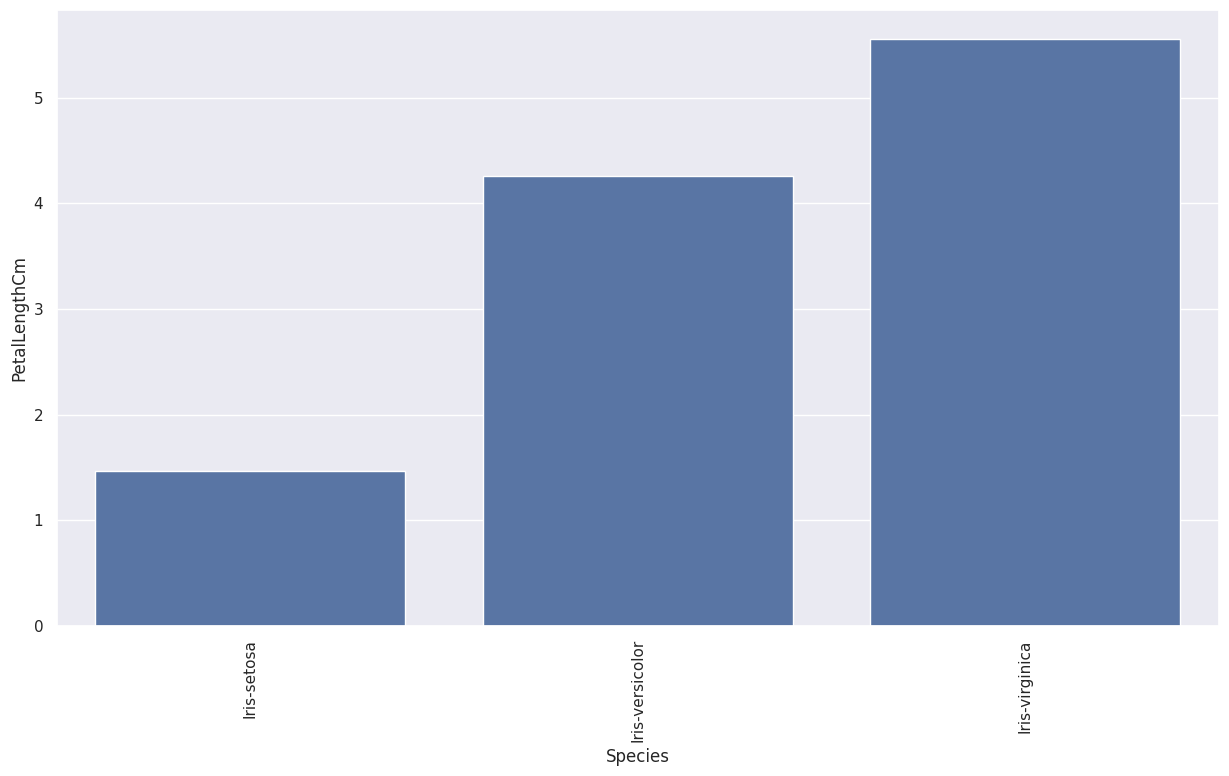

In [33]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Species' , y ='PetalLengthCm', errorbar=('ci', False))  # Complete the code to choose the right variables

plt.xticks(rotation = 90)

plt.show()

**Let's check specimens from which petals have the longest width on average.**

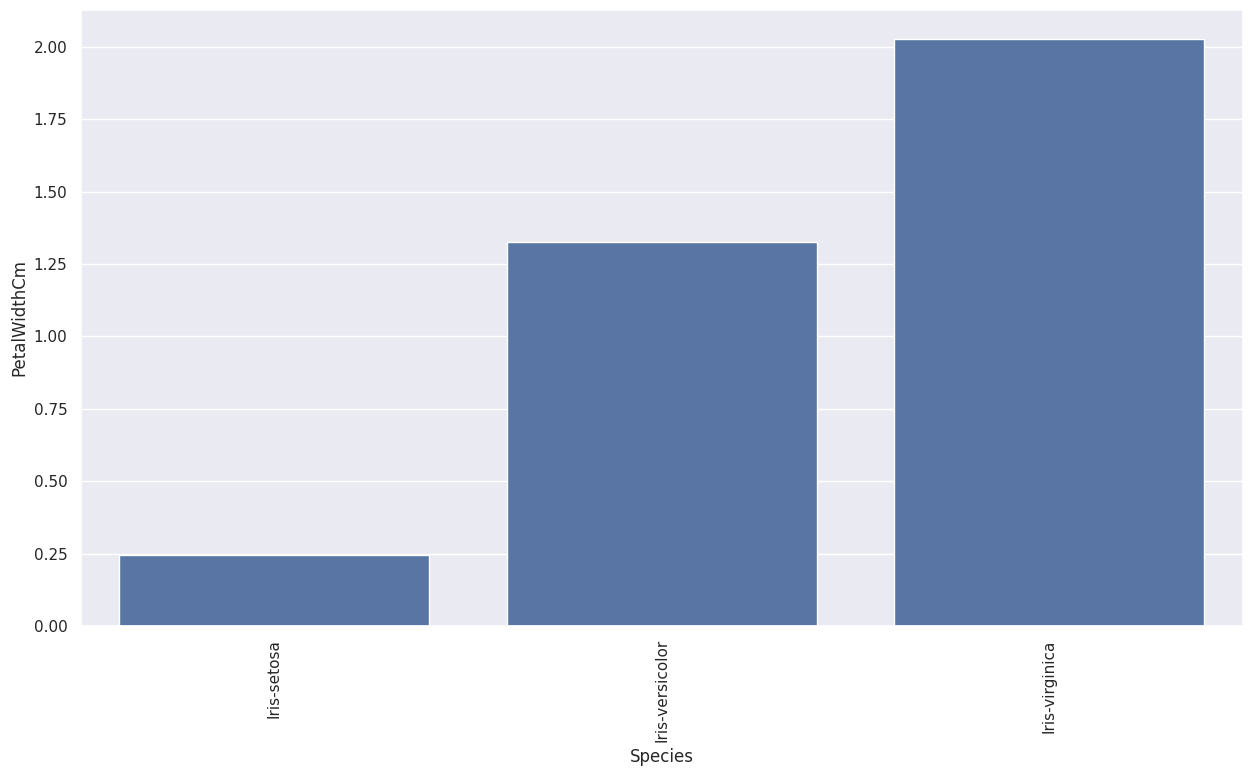

In [34]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Species' , y ='PetalWidthCm', errorbar=('ci', False))  # Complete the code to choose the right variables

plt.xticks(rotation = 90)

plt.show()

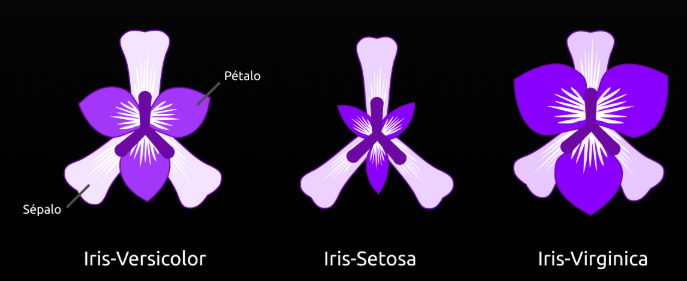

### **Outlier Check**

- Let's plot the boxplots of all numerical columns to check for outliers.

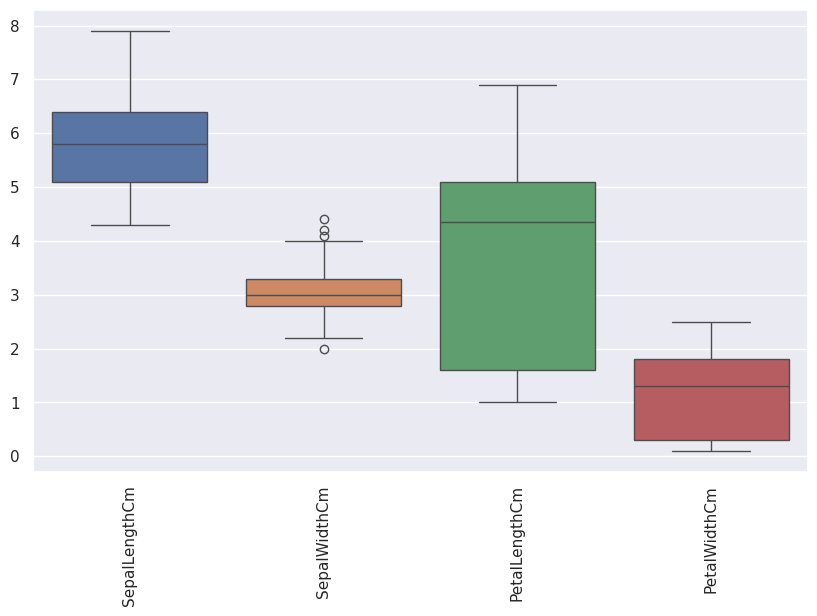

In [37]:
df_no_id = df_copy.drop(columns=['Id'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_id)
plt.xticks(rotation=90)
plt.show()

When analyzing boxplots, variables have different ranges and units.
A variable with a large range (PetalLengthCm) will have more influence on distances than one with a small range (PetalWidthCm). It should be scaled so that the model does not prioritize numerically larger variables.

### **Scaling**

- Let's scale the data before we proceed with clustering.

In [38]:
# Scaling the data before clustering
scaler =StandardScaler() # Initialize the Standard Scaler or Z-Core

subset = df_copy.drop(columns=['Id', 'Species'])  # Complete the code to get the data with numerical features

subset_scaled = scaler.fit_transform(subset) # Fit_transform the scaler function on data subset

In [39]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

In [52]:
scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

print("Mean of each variable after scaling")
print(scaled_df.mean())

print("\nStandard deviation of each variable after scaling:")
print(scaled_df.std())



Mean of each variable after scaling
SepalLengthCm   -4.736952e-16
SepalWidthCm    -7.815970e-16
PetalLengthCm   -4.263256e-16
PetalWidthCm    -4.736952e-16
dtype: float64

Standard deviation of each variable after scaling:
SepalLengthCm    1.00335
SepalWidthCm     1.00335
PetalLengthCm    1.00335
PetalWidthCm     1.00335
dtype: float64


### **Applying PCA**


In [48]:
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = subset.shape[1]                                    # Storing the number of variables in the subset data

pca =  PCA(n_components=n, random_state=1)             # Initialize PCA with n_components = n and random_state = 1

data_pca = pd.DataFrame(pca.fit_transform(subset_scaled))              # Fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_

## **Conclusion:**
In the database study, some variables can be observed to be correlated, such as petal length and width. However, further experiments are needed to determine if they are causal. Also, when obtaining the boxplots, we realize the need to standardize the data so that the model does not prioritize variables that it should not. Since there are only four measurements, it is not "easy" to visualize the data in 4D. Therefore, by applying PCA, we transfer it to a 2D plane so that with only two principal components, we have most of the original information.


## **Recommendations:**

* In the cleaning section, missing data should be better handled, as there may be a considerable change from the results obtained.
* Tests could be performed to determine causality between variables.
* The correlation within the variables is already known; however, the impact of the relationship between them could be determined.
* After asking the hypothesis questions, making all recommendations, and adjusting them, the process could be continued to determine the validity of the model, or, if necessary, repeat it to improve it.